In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ISLP import load_data    # ISLP library for the book, it has built in functions and methods to build models 

from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix, accuracy_score

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'


sns.set(style="white") # Plot parameters defined globally
plt.style.use("seaborn-v0_8-white")     

## *14) Classification with Auto dataset*

In [3]:
df_Auto = load_data('Auto')

df_Auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693          11.5    70   
2  18.0          8         318.0         150    3436          11.0    70   
3  16.0          8         304.0         150    3433          12.0    70   
4  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

### a)

In [4]:
df_Auto['mpg01'] = np.where(df_Auto['mpg'] >= df_Auto['mpg'].median(),1,0)
print(f"Median mpg of the dataset is {df_Auto['mpg'].median()}")

Median mpg of the dataset is 22.75


### b)

In [5]:
df_Auto['cylinders'].unique() # 5 different cylinder types

array([8, 4, 6, 3, 5])

In [6]:
df_Auto['origin'].unique() # 3 different origins 

array([1, 3, 2])

In [7]:
quant_cols = [col for col in df_Auto.columns.tolist() if col not in ['name']] # Treat all columns except name as quantitative

sns.set()

sns.pairplot(df_Auto[quant_cols], kind='scatter', hue = 'mpg01' )

plt.show()

### From the scatter plots, focusing on various attributes vs mpg (hued with mpg01 = 0/1), we can infer that cars with low displacement tend to be in the first class with more miles per gallon. Similar situation applies to horsepower and weight. Origin also seems to affect as origin 3 cars tend to have more mpg, keeping them in the first class. Same situation also applies to Year, as the years progress there seems to be less cars that belong to zeroth class. As the number of cylinders increase, cars tend to be in the zeroth class as expected. Acceleration does not seem to have super direct effect on the mpg, as there are many cars with similar accelaration belonging to both classes. 

<Axes: xlabel='mpg01', ylabel='acceleration'>

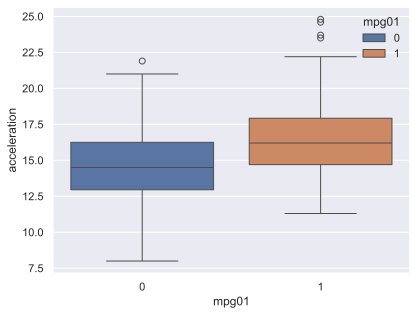

In [8]:
sns.boxplot(x = 'mpg01', y = 'acceleration', data = df_Auto,  hue = 'mpg01') # there is some relation but it is not expected to be so strong

<Axes: xlabel='mpg01', ylabel='year'>

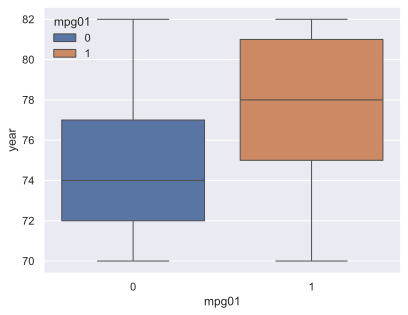

In [9]:
sns.boxplot(x = 'mpg01', y = 'year', data = df_Auto,  hue = 'mpg01') 

Text(0.5, 1.0, 'Correlation Heatmap of Auto dataset')

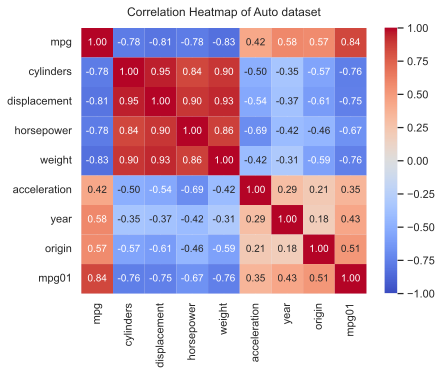

In [10]:

corr_Auto = df_Auto[quant_cols].corr()

heatmp = sns.heatmap(corr_Auto, vmin=-1, vmax=1, annot = True, fmt=".2f", annot_kws={"size": 10}, cmap='coolwarm') # .corr() automatically ignores the qualitative 'Direction'

heatmp.set_title('Correlation Heatmap of Auto dataset', fontdict={'fontsize':12}, pad=12)

### The top variables associate with mpg01 are cylinders, weight, displacement. Some other attributes high absolute value correlation might stem from these attributes as well. For example, origin 3 cars tend to have less cylinders or the recently produced cars have less weight etc. Therefore we can stick with these main predictors for the analysis below. 

### c) 

In [13]:
X = df_Auto[['cylinders', 'displacement', 'weight']].values
y = df_Auto['mpg01'].values

scaler = StandardScaler(with_mean=True, with_std=True, copy = True) # scale the selected features 

s_fit = scaler.fit(X)

Xstd_auto = s_fit.transform(X)

Xstd_auto_df = pd.DataFrame(Xstd_auto,columns = df_Auto[['cylinders', 'displacement', 'weight']].columns)

Xstd_auto_df.head()



cylinders  displacement    weight
0   1.483947      1.077290  0.620540
1   1.483947      1.488732  0.843334
2   1.483947      1.182542  0.540382
3   1.483947      1.048584  0.536845
4   1.483947      1.029447  0.555706

In [14]:
X_train, X_test, y_train, y_test = train_test_split(Xstd_auto_df, y, random_state=1) # use train_test_split from sklearn to automatically split the dataset 

### d) - g) 

In [16]:
# For logistic regression lets use the method from the sklearn library instead of StatsModels GLM with Binominal distribution,

lR = LR()

lDA = LDA(store_covariance=False)

qDA = QDA(store_covariance=False)

nBC = GaussianNB()

auto_models = [lDA,qDA,lR,nBC]

for model in auto_models:

    model_fit = model.fit(X_train, y_train)

    label_pred = model_fit.predict(X_test)

    print(f"Overall accuracy of the {str(model)} on the test set is {model.score(X_test,y_test) * 100:.3f}%") # shortcut for the overall accuracy score via .score()
    print('\n')

Overall accuracy of the LinearDiscriminantAnalysis() on the test set is 92.857%


Overall accuracy of the QuadraticDiscriminantAnalysis() on the test set is 93.878%


Overall accuracy of the LogisticRegression() on the test set is 92.857%


Overall accuracy of the GaussianNB() on the test set is 92.857%




### h)

In [19]:
for K in range(1,30):

    knn = KNN(n_neighbors=K)
    
    knn_pred = knn.fit(X_train, y_train).predict(X_test)

    print(f"Overall accuracy of the KNN classifier with K = {K} on the test set is {accuracy_score(knn_pred,y_test):.5f}%")

Overall accuracy of the KNN classifier with K = 1 on the test set is 0.84694%
Overall accuracy of the KNN classifier with K = 2 on the test set is 0.85714%
Overall accuracy of the KNN classifier with K = 3 on the test set is 0.90816%
Overall accuracy of the KNN classifier with K = 4 on the test set is 0.90816%
Overall accuracy of the KNN classifier with K = 5 on the test set is 0.89796%
Overall accuracy of the KNN classifier with K = 6 on the test set is 0.88776%
Overall accuracy of the KNN classifier with K = 7 on the test set is 0.87755%
Overall accuracy of the KNN classifier with K = 8 on the test set is 0.88776%
Overall accuracy of the KNN classifier with K = 9 on the test set is 0.87755%
Overall accuracy of the KNN classifier with K = 10 on the test set is 0.89796%
Overall accuracy of the KNN classifier with K = 11 on the test set is 0.89796%
Overall accuracy of the KNN classifier with K = 12 on the test set is 0.89796%
Overall accuracy of the KNN classifier with K = 13 on the tes

### There are various best values of K where the accuracy on the test set is maximal, the lowest of such values is K = 14